In [9]:
import numpy as np
import pandas as pd
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

## Final Model

* After a lot of iteration and testing, this is the best model I have found so far.
* The main improvement here is adding the TF-IDF (Term frequency - Inverse Frequency) pre-procesing to the mix.
* Also I tweak the hyperparameters of best models to find the best combination.

#### I'm going to import the train.csv again to mantain order:

In [10]:
train = pd.read_csv('train.csv', usecols=['id', 'excerpt', 'target'])
test_df = pd.read_csv('validation.csv', usecols=['id', 'excerpt', 'target'])

In [11]:
X_train = train_df['excerpt']
y_train = train_df['target']

X_test = test_df['excerpt']
y_test = test_df['target']

In [13]:
models = {'MLPRegressor': MLPRegressor(),
          'Ridge': Ridge(),
          'SVR': SVR(kernel = 'rbf')}

In [14]:
mean_squared_errors = []
r2_scores = []

for model, regr in models.items():
    print(f'doing {model}...')
    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('rgr', regr)])
    print(f'training {model}...')
    pipeline.fit(X_train, y_train)
    print(f'predicting {model}...')
    preds = pipeline.predict(X_test)
    print(f'saving results {model}...', '\n')
    
    mean_squared_errors.append(mean_squared_error(y_test, preds)**(1/2))
    r2_scores.append(r2_score(y_test,preds))

doing MLPRegressor...
training MLPRegressor...
predicting MLPRegressor...
saving results MLPRegressor... 

doing Ridge...
training Ridge...
predicting Ridge...
saving results Ridge... 

doing SVR...
training SVR...
predicting SVR...
saving results SVR... 



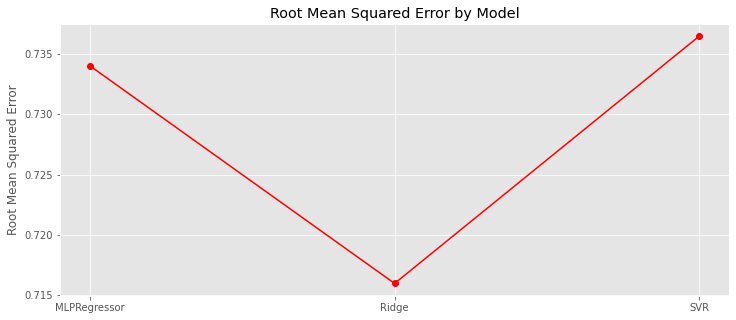

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.plot(models.keys(),mean_squared_errors,color='r',marker='o')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error by Model')
plt.show()

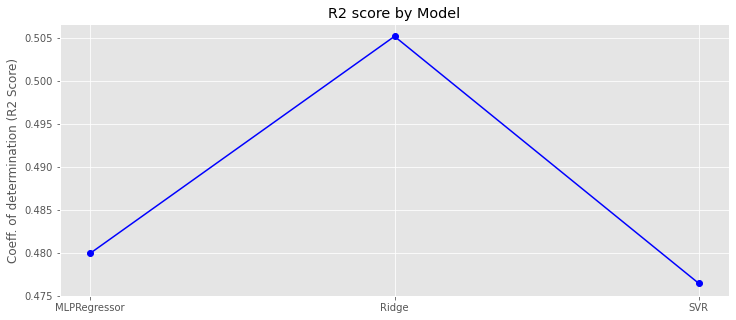

In [16]:
plt.figure(figsize=(12,5))
plt.plot(models.keys(), r2_scores,color='b', marker='o')
plt.ylabel('Coeff. of determination (R2 Score)')
plt.title('R2 score by Model')
plt.show()